# Métodos de orden superior

## Método de Taylor

1. Crear una función que reciba una función f y un valor k y devuelva la derivada total k-ésima de f.
2. Programar el método de Taylor.
3. Aplicar el método de Taylor de orden 3 al problema de valor inicial $$x' = t(1-x^2),\quad x(0)=0.$$ Aproximar la solución en $t=2$ con 20 pasos y comparar los resultados obtenidos con el método de Euler.
4. Comparar el error cometido al estimar $x(2)$ para la solución del PVI $$x' = x,\quad x(0)=1$$ con los métodos de Taylor de orden $1,2,3,4,5$ y  número de pasos entre 10 y 100.
5. Aproximar $x(2)$ para la solución del PVI $$x' = x,\quad x(0)=1$$ con el método de Taylor de orden $3$. Aproximar el error con usando el método de Taylor de orden $4$. Comparar la estimación del error con el valor exacto.

In [89]:
f(t,x) = t*(1-x^2)

In [90]:
f.diff()

(t, x) |--> (-x^2 + 1, -2*t*x)

In [91]:
def derivada_total_ecuacion(f,k):
    """
    Calcula la derivada total k-ésima de la solución de la ecuación diferencial 
    x' = f(t, x).
    
    Args:
    f: Función que define la ecuación diferencial (f(t, x)).
    x: La variable dependiente (en este caso, x).
    t: La variable independiente (en este caso, t).
    k: El orden de la derivada que se desea calcular.
    
    Returns:
    La derivada total k-ésima de x(t).
    """
    # Iniciamos con la derivada de primer orden
    derivada = f(t, x)
    
    # Calculamos la derivada total k-ésima de manera sucesiva
    for i in range(k):
        # Derivamos respecto de t, aplicando la regla de la cadena
        derivada = derivada.diff(t) + derivada.diff(x) * f(t, x)
    
    return derivada.expand()

In [92]:
derivada_total_ecuacion(f,0)

-t*x^2 + t

In [93]:
derivada_total_ecuacion(f,1)

2*t^2*x^3 - 2*t^2*x - x^2 + 1

In [94]:
derivada_total_ecuacion(f,2)

-6*t^3*x^4 + 8*t^3*x^2 + 6*t*x^3 - 2*t^3 - 6*t*x

In [95]:
def phi_taylor(f,h,k):
    return sum([ derivada_total_ecuacion(f,i)*h^i/factorial(i+1) 
                     for i in [0 .. k-1 ]])

In [96]:
var('h')
phi_taylor(f,h,3)

-1/3*(3*t^3*x^4 - 4*t^3*x^2 - 3*t*x^3 + t^3 + 3*t*x)*h^2 - t*x^2 + 1/2*(2*t^2*x^3 - 2*t^2*x - x^2 + 1)*h + t

In [49]:
def taylor(f,a,b,x0,n,k):
    h = (b-a)/n
    ti = [a.n(), a+h .. b]
    xi = [x0]*(n+1)
    T(t,x) = phi_taylor(f,h,k)
    for i in [ 1..n ]:
        xi[i] = xi[i-1] + h * T( ti[i-1] , xi[i-1] ) 
    return list(zip(ti,xi))

In [52]:
# Datos del problema
f(t,x) = t*(1-x^2)
a = 0
b = 2
x0 = 0

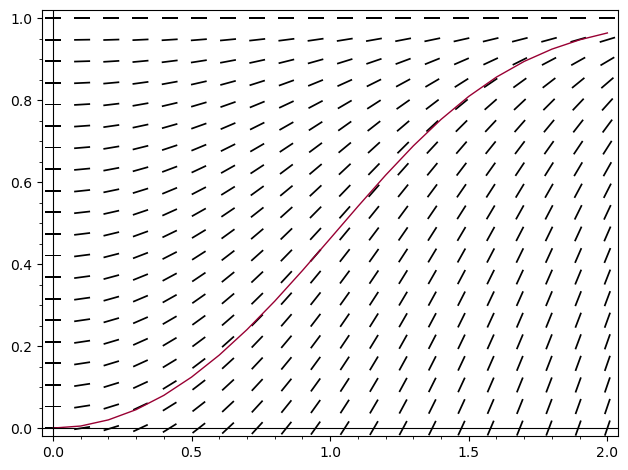

In [55]:
line(taylor(f,a,b,x0,20,3),color=[0.6,0,0.2]) + \
plot_slope_field(f,(t,0,2),(x,0,1))

## Método de Runge-Kutta

1. Crea una función que reciba la tabla de Butcher de un método de Runge-Kutta, la aproximación $(t_n,x_n)$ y la función que define el campo de la ecuación diferencial y calcule un paso del método de Runge-Kutta.
2. Crea una función que reciba la tabla de Butcher, el PVI, el valor final del tiempo $b$ y el número de pasos $n$ y devuelva la aproximación de la solución del PVI en $t=b$ mediante $n$ pasos del método de Runge-Kutta.
3. Aplicar el método de Runge-Kutta de cuarto orden al PVI $$x'=t(1-x^2),\quad x(0)=0.$$ Aproximar la solución con 20 pasos y comparar los resultados obtenidos con el método de Euler y el anterior de Taylor de orden 4. Además, comparar los resultados con el comando de Sage `desolve_rk4`.
4. Aproximar $x(2)$ para la solución del PVI $$x' = x,\quad x(0)=1$$ con el método de Runge-Kutta-Fehlberg, usando el método de orden $4$ para aproximar la solución y el de orden $5$ para aproximar el error. Comparar la estimación del error con el valor exacto.

In [1]:
RK4 = matrix([[0, 0, 0, 0, 0],
[1/2, 1/2, 0, 0, 0],
[1/2, 0, 1/2, 0, 0],
[1, 0, 0, 1, 0],
[0,1/6, 1/3, 1/3, 1/6]])
show(RK4)

[  0   0   0   0   0]
[1/2 1/2   0   0   0]
[1/2   0 1/2   0   0]
[  1   0   0   1   0]
[  0 1/6 1/3 1/3 1/6]

In [21]:
theta = vector(RK4[:-1,0])
theta

(0, 1/2, 1/2, 1)

In [27]:
alpha = vector(RK4[-1,1:])

In [34]:
Alpha = matrix(RK4[:-1,1:])

In [35]:
def butcher(T):
    theta = vector(T[:-1,0])
    alpha = vector(T[-1,1:])
    Alpha = matrix(T[:-1,1:])
    return theta,alpha,Alpha

In [36]:
theta,alpha,Alpha = butcher(RK4)
show(theta,alpha,Alpha)

(0, 1/2, 1/2, 1) (1/6, 1/3, 1/3, 1/6) [  0   0   0   0]
[1/2   0   0   0]
[  0 1/2   0   0]
[  0   0   1   0]

In [37]:
f(t,x) = t*(1-x^2)
t0 = 0.
x0 = 0.
h = 0.1

In [40]:
m = theta.length() - 1

In [46]:
tau = vector(RDF,[t0]*(m+1)) + h*theta
tau

(0.0, 0.05, 0.05, 0.1)

In [48]:
eta = vector(RDF,[x0]*(m+1))
eta

(0.0, 0.0, 0.0, 0.0)

In [53]:
for mu in [1 .. m]:
    suma = 0
    for k in [0 .. mu-1]:
        suma += Alpha[mu,k]*f(tau[k],eta[k])
    eta[mu] = x0 + h*suma
eta

(0.0, 0.0, 0.0025000000000000005, 0.00499996875)

In [51]:
for mu in [1 .. m]:
    eta[mu] = x0 \
    + h*sum([Alpha[mu,k]*f(tau[k],eta[k]) for k in [0 .. mu-1]])
eta

(0.0, 0.0, 0.0025000000000000005, 0.00499996875)

In [58]:
for mu in [1 .. m]:
    eta[mu] = x0 +  h*vector(Alpha[mu,:])\
                    *vector([f(tau[k],eta[k]) for k in [0 .. m]])
eta

(0.0, 0.0, 0.0025000000000000005, 0.00499996875)

In [61]:
x1 = x0 + h*sum([alpha[mu]*f(tau[mu],eta[mu]) for mu in [0 .. m]])
x1

0.00499994791718750

In [84]:
def rk_unpaso(T,f,t0,x0,h):
    theta,alpha,Alpha = butcher(T)
    m = theta.length() - 1
    tau = vector(RDF,[t0]*(m+1)) + h*theta
    eta = vector(RDF,[x0]*(m+1))
    for mu in [1 .. m]:
        eta[mu] = x0 \
        + h*sum([Alpha[mu,k]*f(tau[k],eta[k]) for k in [0 .. mu-1]])
    x1 = x0 + h*sum([alpha[mu]*f(tau[mu],eta[mu]) for mu in [0 .. m]])
    return x1

In [85]:
rk_unpaso(RK4,f,0.,0.,0.1)

0.00499994791718750

In [86]:
def runge_kutta(f,a,b,x0,n,T):
    h = (b-a)/n
    ti = [a.n(), a+h .. b]
    xi = [x0]*(n+1)
    for i in [ 1..n ]:
        xi[i] = rk_unpaso(T,f,ti[i-1],xi[i-1],h) # xi[i-1] + h * T( ti[i-1] , xi[i-1] ) 
    return list(zip(ti,xi))

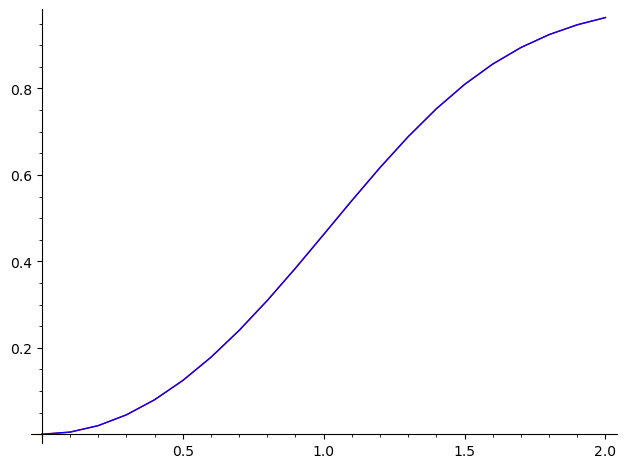

In [90]:
line(runge_kutta(f,0.,2.,0.,20,RK4),color='red') + \
line(desolve_rk4(f(t,x),x,ics=[0,0],end_points=2,step=0.1))

## Sistemas de ecuaciones

1. Aplicar  los métodos de Taylor y Runge-Kutta (ambos de cuarto orden) al problema de valor inicial
$$x'=-y+x^2,\quad y'=x,\quad x(0)=0.3,\quad y(0)=0.$$
con tamaño de paso $h=0.1$ y $n=50,100,500,1000$.

In [3]:
F(x,y) = [ -y + x^2 , x ]
x0 = vector(RDF,[0.3,0])
h = 0.1

In [9]:
def derivada_total(f,k):
    
    derivada = copy(f)
    
    for i in range(k):
        derivada = derivada.diff() * f
        
    return derivada

In [10]:
def phi_taylor(f,h,k):
    
    return sum([ derivada_total(f,i)*h^i/factorial(i+1) 
                     for i in [0 .. k-1 ]])

In [11]:
def taylor(f,x0,h,n,k):
    
    xi = [vector(RDF,x0)]*(n+1)
    
    T = phi_taylor(f,h,k)
    
    for i in [ 1 .. n ]:
        xi[i] = xi[i-1] + h * T( *xi[i-1] ) 
    
    return xi

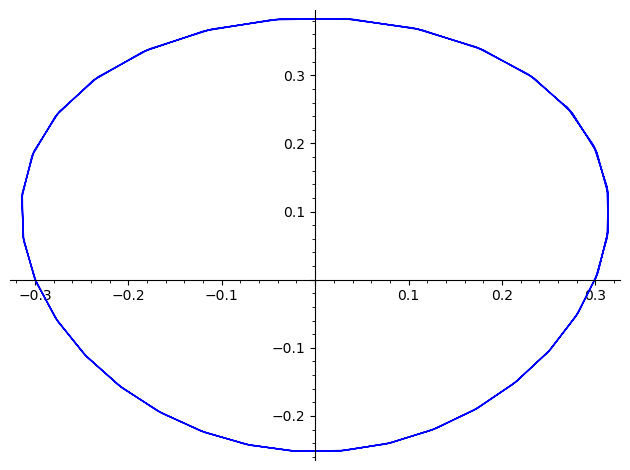

In [18]:
line(taylor(F,[0.3,0.],0.2,100,4))

In [36]:
F(x,y) = [ y , -sin(x) ]
x0 = vector(RDF,[1.0,0])
h = 0.1

In [52]:
angulo = [xi for xi,yi in taylor(F,x0,0.1,100,4)]
fotogramas = [ line([(0,0),(sin(a),-cos(a))],xmin=-1,xmax=1,ymin=-1)
      + point((sin(a),-cos(a)),color='red',size=50) for a in angulo]

Animation with 101 frames
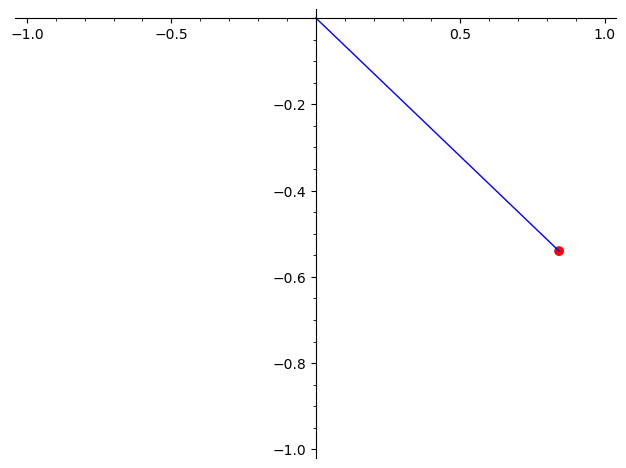

In [53]:
animate(fotogramas)